In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
sns.set_style('darkgrid')

In [3]:
def format_x_ticks(x, pos):
    return f'{x:.1f}'

def format_Y_ticks(y, pos):
    """
    Formata o número com 4 algarismos significativos, preservando zeros à direita.

    Parâmetros:
    - y: valor do número a ser formatado.
    - pos: posição do marcador (não usado nesta função).

    Retorna:
    - str: o número formatado com 4 algarismos significativos.
    """
    if y == 0:
        return '0.000'
    else:
        # Obter o número com 4 dígitos significativos
        formatted = f'{y:.4g}'
        
        # Se a notação científica for usada, converte para float novamente
        if 'e' in formatted or 'E' in formatted:
            formatted = f'{float(formatted):.4f}'
        else:
            # Adicionar zeros à direita para garantir 4 dígitos significativos
            if '.' in formatted:
                integer_part, decimal_part = formatted.split('.')
                while len(decimal_part) < 3:
                    decimal_part += '0'
                formatted = f'{integer_part}.{decimal_part}'
            else:
                formatted += '.000'

        return formatted

In [4]:
path = 'filtro_passa_banda/'

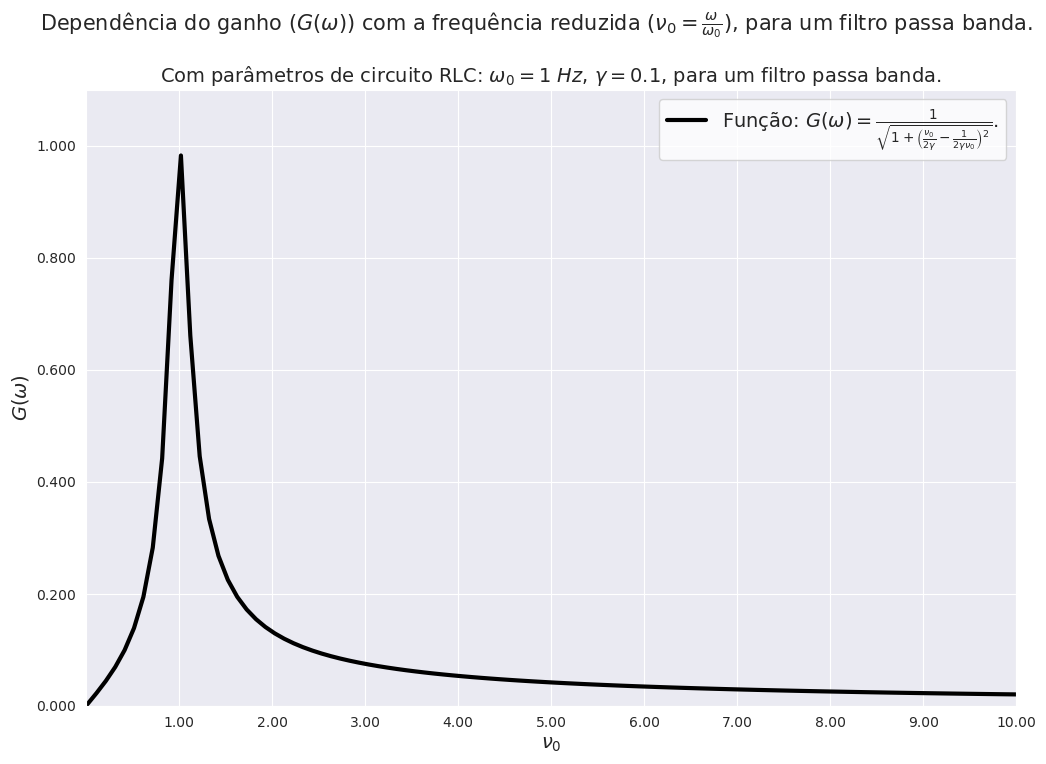

In [44]:
# Definindo a função G que agora recebe omega e omega_0
def G(omega, omega_0, gamma):
    nu_0 = omega / omega_0  # Calculando a frequência reduzida
    return 1 / np.sqrt(1 + (nu_0 / (2 * gamma) - (1 / (2 * gamma * nu_0)))**2)

# Parâmetros
gamma = 0.1
omega = np.linspace(0.01, 10, 100)  # Valores de omega variando de 0.01 a 10
omega_0 = 1  # Assumindo omega_0 = 1 para simplicidade

# Calculando G usando omega e omega_0
G_values = G(omega, omega_0, gamma)

# Formatar os ticks no eixo x
def format_x_ticks(x, pos):
    return f'{x:.2f}'

# Formatar os ticks no eixo y
def format_ticks(y, pos):
    if y == 0:
        return '0.000'
    else:
        formatted = f'{y:.4g}'
        if 'e' in formatted or 'E' in formatted:
            formatted = f'{float(formatted):.4f}'
        else:
            if '.' in formatted:
                integer_part, decimal_part = formatted.split('.')
                while len(decimal_part) < 3:
                    decimal_part += '0'
                formatted = f'{integer_part}.{decimal_part}'
            else:
                formatted += '.000'
        return formatted

# Função em LaTeX para a legenda
legend_text = r'Função: $G(\omega) = \frac{1}{\sqrt{1 + \left(\frac{\nu_0}{2\gamma} - \frac{1}{2\gamma \nu_0}\right)^2}}$.'

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.plot(omega / omega_0, G_values, label=f'{legend_text}', color='black', lw=3)
plt.suptitle(r'Dependência do ganho $(G(\omega))$ com a frequência reduzida $(\nu_0 = \frac{\omega}{\omega_0})$, para um filtro passa banda.', fontsize=15)
plt.title(fr'Com parâmetros de circuito RLC: $\omega_{0}={omega_0} \ Hz$, $\gamma = 0.1$, para um filtro passa banda.', fontsize=14)
plt.xlabel(r'$\nu_0$', fontsize=14)
plt.ylabel(r'$G(\omega)$', fontsize=14)
plt.legend(facecolor='white', fontsize=14, loc='best')
plt.xticks(np.arange(1, 11, 1))  # Definindo o eixo x de 1 em 1
plt.ylim(0, 1.1)
plt.xlim(0, 10)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.savefig(path + 'G_versus_freq_red.pdf')
plt.show()

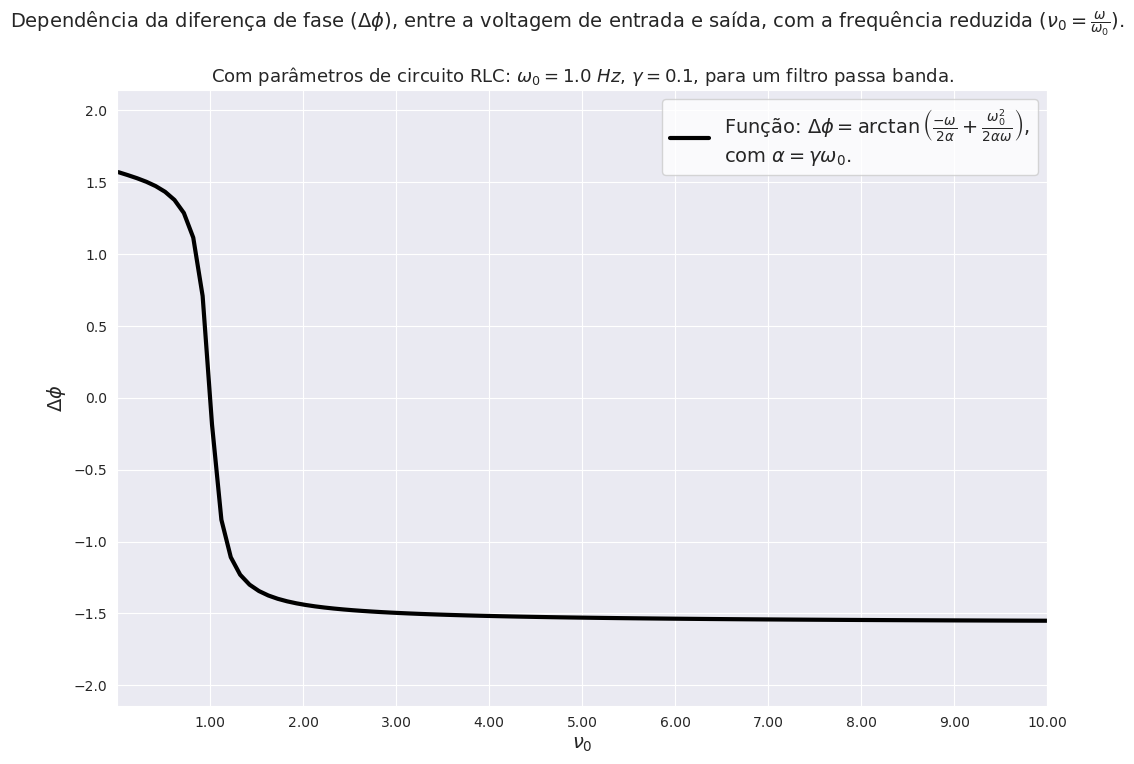

In [38]:
# Definindo a função de fase
def phase(omega, alpha, omega_0):
    return np.arctan((-omega / (2 * alpha)) + (omega_0**2 / (2 * alpha * omega)))

# Parâmetros
omega_0 = 1.0  # Definindo a frequência natural como 1 (valor arbitrário)
alpha = 0.1 * omega_0  # Constante de amortecimento como 10% de omega_0
omega = np.linspace(0.01 * omega_0, 10 * omega_0, 100)  # Valores de omega de 0.01*omega_0 a 10*omega_0

# Função em LaTeX para a legenda
legend_text = r'Função: $\Delta \phi = \arctan\left(\frac{-\omega}{2\alpha} + \frac{\omega_0^2}{2\alpha\omega}\right)$,' + '\n' + r'com $\alpha = \gamma \omega_0$.' 

# Calculando a fase
phi_values = phase(omega, alpha, omega_0)

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.plot(omega/omega_0, phi_values, label=f'{legend_text}', color='black', lw=3)
plt.suptitle(r'Dependência da diferença de fase $(\Delta \phi)$, entre a voltagem de entrada e saída, com a frequência reduzida $(\nu_0 = \frac{\omega}{\omega_0})$.', fontsize=14)
plt.title(fr'Com parâmetros de circuito RLC: $\omega_{0}={omega_0} \ Hz$, $\gamma={alpha}$, para um filtro passa banda.', fontsize=13)
plt.xlabel(r'$\nu_0$', fontsize=14)
plt.ylabel(r'$\Delta \phi$', fontsize=14)
plt.legend(facecolor='white', fontsize=14)
plt.xticks(np.arange(1, 11, 1))  # Definindo o eixo x de 1 em 1
plt.xlim(0.00, 10)
plt.ylim(-np.pi + 1, np.pi - 1) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.savefig(path + 'phi_versus_freq_red.pdf')  
plt.show()